# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd #reads data
import numpy as np
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # visualizations


In [2]:
# [I]Favorite world: preference to focus on the outer world or on own’s
# inner world, called Extraverted or Introverted, respectively; 
# [II] Information: preference to focus on the basic information available
# or preference to interpret and add meaning, called Sensing or
# Intuition, respectively; 
# [III] Decisions: preference to first look at logic and consistency or first look at the people and special
# circumstances, called Thinking or Feeling, respectively; 
# [IV] Structure: preference to get things decided or stay open to new
# information and options while dealing with the outside world,
# called Judging or Perceiving, respectively.


#For example, to determine an Extraverted preference or an Introverted preference, there were 21 questions throughout 
#the questionnaire in that category. 
#If the subjects choose all of those 21
#questions as Extraverted preference, the score would be twenty-one for Extraverted preference 
#and zero for Introverted preference. 
#If the subject chose seven questions in Introverted preference
#the score would be fourteen for Extraverted and seven for
#Introverted. By summing the total score for each preference
#category, the average score of type preference for that subject was determined.

#Different tests have different number of questions 

# https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0037450&type=printable


In [3]:
#ideal posture = A #kyphotic-lordotic = B #flat back = C #sway-back(lordosis) = D
df = pd.read_csv("C:\\Users\\Katerina\\OneDrive\\Documents\\LCW+ Assignments\\Final Project DA\\data\\posture_vs_personality.csv")
df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
df.columns

Index(['S No', 'AGE', 'HEIGHT', 'WEIGHT', 'SEX', 'ACTIVITY LEVEL', 'PAIN 1',
       'PAIN 2', 'PAIN 3', 'PAIN 4', 'MBTI', 'E', 'I', 'S', 'N', 'T', 'F', 'J',
       'P', 'POSTURE'],
      dtype='object')

In [5]:
# df.groupby('MBTI')[['POSTURE']].count().sort_values('MBTI' , ascending= True) #Missing INTP = No one had that personality
#counting how many 

In [6]:
df.groupby('MBTI' , sort = True)[['POSTURE']].sum()

,POSTURE
MBTI,
ENFJ,ACBBB
ENFP,BAAAABAAAA
ENTJ,BDCBD
ENTP,BBCBA
ESFJ,ACDDBBCBBBB
ESFP,BAACABBBAACB
ESTJ,ADADBBB
ESTP,ABBABBBACB
INFJ,DCBD


In [7]:
df.groupby('MBTI').ngroups # confirming there are 16 personality types, but only 15 shown any results

15

In [8]:
df.groupby("POSTURE").groups
#df.groupby("MBTI").groups

{'A': [0, 2, 4, 14, 16, 26, 29, 30, 37, 42, 43, 44, 52, 61, 64, 70, 75, 85, 86, 90, 94, 96], 'B': [1, 6, 10, 11, 13, 17, 18, 21, 22, 32, 38, 39, 47, 48, 49, 51, 54, 55, 56, 57, 59, 60, 62, 65, 67, 72, 74, 78, 79, 83, 87, 88, 91, 92, 93, 95], 'C': [8, 19, 24, 25, 33, 35, 36, 40, 50, 58, 63, 66, 68, 71, 73, 76, 80, 81, 89], 'D': [3, 5, 7, 9, 12, 15, 20, 23, 27, 28, 31, 34, 41, 45, 46, 53, 69, 77, 82, 84]}

In [11]:
df['E VS I'] = df['E'] - df['I']
df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,...,E,I,S,N,T,F,J,P,POSTURE,E VS I
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,...,18,3,17,9,9,13,18,4,A,15
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,...,6,15,14,12,21,3,13,9,B,-9
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,...,15,6,16,10,15,9,12,10,A,9
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,...,6,15,21,5,13,11,19,3,D,-9
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,...,14,7,20,6,9,15,16,6,A,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,...,19,2,22,4,19,5,2,20,B,17
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,...,11,10,17,9,6,18,13,9,B,1
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,...,12,9,9,17,6,18,2,20,A,3
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,...,11,10,22,14,8,16,14,8,B,1


In [21]:
df['E VS I'] = df['MBTI'].astype(str).str[0]
df

        

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,...,E,I,S,N,T,F,J,P,POSTURE,E VS I
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,...,18,3,17,9,9,13,18,4,A,E
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,...,6,15,14,12,21,3,13,9,B,I
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,...,15,6,16,10,15,9,12,10,A,E
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,...,6,15,21,5,13,11,19,3,D,I
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,...,14,7,20,6,9,15,16,6,A,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,...,19,2,22,4,19,5,2,20,B,E
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,...,11,10,17,9,6,18,13,9,B,E
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,...,12,9,9,17,6,18,2,20,A,E
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,...,11,10,22,14,8,16,14,8,B,E


In [24]:
# df.groupby('MBTI').get_group(('A', 'B' , 'C' , 'D'))
# pd.concat([group for (name, group) in grouped if name in ['name1', 'name2']])
#df.concat(['MBTI' for ('POSTURE' , 'MBTI') in grouped if name in ['A', 'B', 'C', 'D']])
df.loc[df['E VS I'] == 'E',['POSTURE', 'AGE' , 'E VS I']]


,POSTURE,AGE,E VS I
0,A,53,E
2,A,30,E
4,A,45,E
7,D,65,E
8,C,66,E
...,...,...,...
92,B,16,E
93,B,45,E
94,A,43,E
95,B,28,E


In [38]:
df.loc[df['E VS I'] == 'E',['AGE', 'E VS I']].groupby('AGE').count()

,E VS I
AGE,
11,1
13,1
16,2
19,1
20,3
21,1
22,1
23,1
25,1


In [41]:
df.loc[df['E VS I'] == 'E',['POSTURE', 'E VS I']].groupby('POSTURE').count()

,E VS I
POSTURE,
A,21
B,30
C,8
D,6


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [ ]:
df.plot(y =['POSTURE', 'AGE'] , x='MBTI', kind = 'line')
plt.show()

<AxesSubplot:xlabel='POSTURE'>

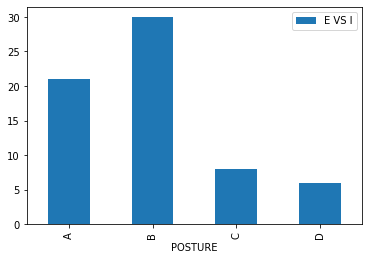

In [43]:
df.loc[df['E VS I'] == 'E',['POSTURE', 'E VS I']].groupby('POSTURE').count().plot(kind = 'bar')

<AxesSubplot:xlabel='POSTURE'>

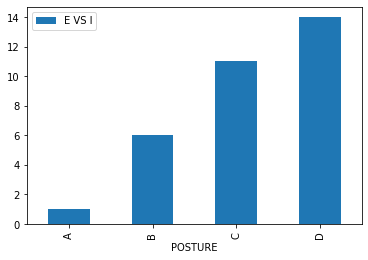

In [44]:
df.loc[df['E VS I'] == 'I',['POSTURE', 'E VS I']].groupby('POSTURE').count().plot(kind = 'bar')
#introverts are more hunchback 'sway back'

<AxesSubplot:xlabel='POSTURE'>

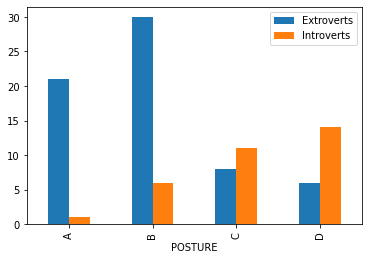

In [57]:
df_e = df.loc[df['E VS I'] == 'E',['POSTURE', 'E VS I']].groupby('POSTURE').count()
df_i = df.loc[df['E VS I'] == 'I',['POSTURE', 'E VS I']].groupby('POSTURE').count()
df_total = df_e.merge(df_i, on = 'POSTURE')
df_total.rename(columns={"E VS I_x": "Extroverts", "E VS I_y": "Introverts"} , inplace = True)


df_total.plot(kind='bar')

<AxesSubplot:xlabel='POSTURE'>

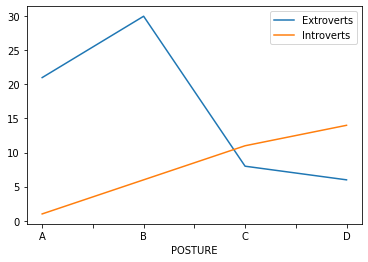

In [59]:
df_total.plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

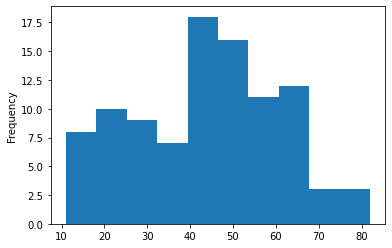

In [61]:
df['AGE'].plot(kind = 'hist')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
I suspected what the data ended up presenting. Introverts slouch more and therefore have whats known as sway back. Extroverts typically hold their chest out, so most of them have lordosis. Extroverts were also high in have a normal spine. 
2. Do you have any concerns about your dataset? 
I have no concerns about my data. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
My data is honestly cleaned. I have no notes to make. I